In [215]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'men': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

In [10]:
np.mean(df['men']) - np.mean(df['women'])

12.469999999999999

In [9]:
df['men'].mean()-df['women'].mean()

12.469999999999999

In [12]:
x = [2, 7, 4, 3, 6, 4, 1, 2]
y = [5, 2, 4, 8, 1, 6, 7]

In [15]:
np.median(x)

3.5

In [16]:
np.median(y) - np.median(x)

1.5

In [17]:
df['men'].median()

75.6

In [20]:
df['women'].median()

57.599999999999994

In [41]:
patients = pd.concat([df['men'], df['women']])
#patients = df['men'].append(df['women'])
patients.median()

59.6

In [48]:
Q1 = np.quantile(x, 0.25)
Q3 = np.quantile(x, 0.75)
print(Q1, Q3)
Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)
print(Q1, Q3)
print(sorted(x), '\n', sorted(y))

2.0 4.5
3.0 6.5
[1, 2, 2, 3, 4, 4, 6, 7] 
 [1, 2, 4, 5, 6, 7, 8]


Также у quantile()  существует необязательный параметр, который  указывает метод интерполяции, который нужно использовать, когда требуемый квантиль лежит между двумя точками данных. По умолчанию используется линейная интерполяция.

In [ ]:
DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Чтобы вычислять квантиль как среднее между двумя точками в части данных, необходимо сменить вид интерполяции на следующий: 

In [ ]:
DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='midpoint')

In [60]:
Q1 = df['men'].quantile(0.25, interpolation='midpoint')
Q3 = df['men'].quantile(0.75, interpolation='midpoint')
print(Q1, Q3)
Q1 = df['women'].quantile(0.25, interpolation='midpoint')
Q3 = df['women'].quantile(0.75, interpolation='midpoint')
print(Q1, Q3)

58.6 79.05000000000001
53.9 60.35


In [64]:
df['men'].max() - df['men'].min()

47.5

In [65]:
df['men'].quantile(0.75, interpolation='midpoint') - \
df['men'].quantile(0.25, interpolation='midpoint')

20.45000000000001

In [66]:
df['women'].max() - df['women'].min()

24.599999999999994

In [67]:
df['women'].quantile(0.75, interpolation='midpoint') - \
df['women'].quantile(0.25, interpolation='midpoint')

6.450000000000003

Найдите дисперсию и стандартное отклонение веса для выборки пациентов клиники.

In [68]:
df['men'].std()

15.182533824541057

In [71]:
df['men'].var()

230.5093333333333

In [72]:
df['women'].std()

8.27110767806962

In [73]:
df['women'].var()

68.41122222222224

Проверьте наличие выбросов в выборке пациентов клиники:

In [90]:
Q1 = df['men'].quantile(0.25, interpolation='midpoint')
Q3 = df['men'].quantile(0.75, interpolation='midpoint')
IQC = Q3 - Q1
low = Q1 - IQC*1.5
hight = Q3 + IQC*1.5
for el in df['men']:
    if el < low:
        print(f'Есть выбросы: {el}')
    elif el > hight:
        print(f'Есть выбросы: {el}')
    else:
        print('Нет выбросов')

Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов


In [91]:
df[(df['men']<low) | (df['men']>hight)]

,men,women,patients


In [94]:
Q1 = df['women'].quantile(0.25, interpolation='midpoint')
Q3 = df['women'].quantile(0.75, interpolation='midpoint')
IQC = Q3 - Q1
low = Q1 - IQC*1.5
hight = Q3 + IQC*1.5
for el in df['women']:
    if el < low:
        print(f'Есть выбросы: {el}')
    elif el > hight:
        print(f'Есть выбросы: {el}')
    else:
        print('Нет выбросов')

Нет выбросов
Нет выбросов
Есть выбросы: 72.8
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Нет выбросов
Есть выбросы: 70.7


In [93]:
df[(df['women']<low) | (df['women']>hight)]

,men,women,patients
2,57.5,72.8,57.5
9,52.6,70.7,52.6


Таблица показывает среднюю температуру в январе (в градусах по Цельсию) в одном российском городе за 2007-2018 годы:

In [95]:
df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

In [97]:
round(df['temp'].mean(), 1)

-6.1

In [98]:
round(df['temp'].median(), 1)

-6.0

In [99]:
round(df['temp'].std(), 1)

2.3

In [100]:
df['temp'].max() - df['temp'].min()

9.0

In [102]:
round(df['temp'].quantile(0.75, interpolation='midpoint') - \
df['temp'].quantile(0.25, interpolation='midpoint'), 1)

1.9

In [109]:
Q1 = df['temp'].quantile(0.25, interpolation='midpoint')
Q3 = df['temp'].quantile(0.75, interpolation='midpoint')
IQC = Q3 - Q1
low = Q1 - 1.5*IQC
hight = Q3 + 1.5*IQC
df[(df['temp']<low) | (df['temp']>hight)]

,year,temp
8,2015,-12.1


In [115]:
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})

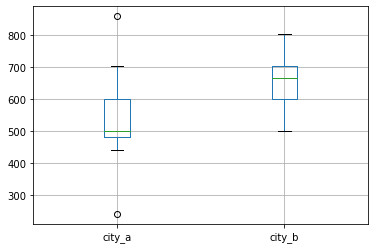

In [117]:
import seaborn as sns
%matplotlib inline
boxplot = df.boxplot(column=['city_a', 'city_b'])
#sns.boxplot(data = df)

In [121]:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
})

Найдите на графике отображение медианы. Чему она равна?

Используйте data.median(axis=0) для нахождения численного значения медианы.

value    38.0
dtype: float64

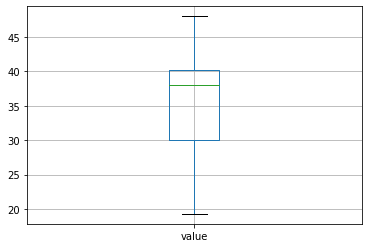

In [127]:
boxplot = data.boxplot(column = 'value')
data.median(axis = 0)
#data.max(axis=0)

В таблице ниже приведены данные о двух группах пользователей определенного сервиса–помощника в администрировании. Данные соответствуют общему количество времени, которое пользователи провели онлайн, используя соответствующее приложение (в часах за месяц).

In [128]:
df = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

<AxesSubplot:>

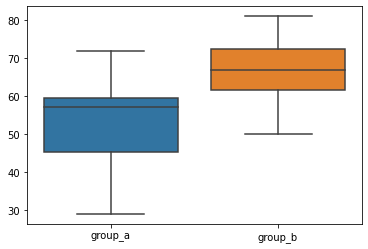

In [131]:
sns.boxplot(data = df)

Чтобы построить на Python эквивалент функций normdist() и norminv(), реализованных во многих инструментах анализа, например, таких как MS Excel, нам понадобится библиотека вероятностных распределений и статистических функций scipy.stats. 

Импортируем norm для работы с нормально распределенными величинами:

In [136]:
from scipy.stats import norm

In [ ]:
Например, найти P(Z <= 1.5) вы можете, обратившись к функции norm.cdf(1.5).

In [137]:
norm.cdf(1.5)

0.9331927987311419

Также можно решить обратную задачу: найти число z, зная соответствующую вероятность P(Z <= z). Это можно сделать, используя функцию norm.ppf(z). Например, если P(Z <= z) = 0.9, то можно найти, что Z ~ 1.28, используя norm.ppf(0.9).

In [138]:
norm.ppf(0.9)

1.2815515655446004

In [143]:
norm.ppf(0.01)

-2.3263478740408408

Z — стандартная нормальная величина. Используя функцию norm.cdf(), найдите ниже указанные значения.

In [145]:
round(norm.cdf(1), 2)

0.84

In [146]:
round(norm.cdf(1.12), 2)

0.87

In [147]:
round(norm.cdf(-1.87), 2)

0.03

In [149]:
round(1 - norm.cdf(2), 2)

0.02

Таким же образом при помощи Python можно находить вероятности и значения для любой нормальной величины, а не только Z, если известны ее параметры: среднее и стандартное отклонение. Для этого есть функции norm.cdf(x, loc = 0, scale = 1) и norm.ppf(q, loc = 0, scale = 1).

norm.cdf(x, loc = 0, scale = 1)

Возвращает нормальную функцию распределения для указанного среднего и стандартного отклонения.
Синтаксис

        x — значение, для которого строится распределение
        loc — среднее арифметическое распределения
        scale — стандартное отклонение распределения

norm.ppf(q, loc = 0, scale = 1)

Возвращает обратное нормальное распределение для указанного среднего и
стандартного отклонения.
Синтаксис

        q — вероятность, соответствующая нормальному распределению
        loc — среднее арифметическое распределения
        scale — стандартное отклонение распределения

Например, если X ~ N(4,2), можно найти P(X<=5) через функцию norm.cdf(5, 4, 2) в Python. 

Первый аргумент — число, меньше (либо равно) которого должен быть X, второй и третий аргумент — это среднее и стандартное отклонение X. 

In [150]:
norm.ppf(0.75, 4, 2)

5.348979500392163

In [152]:
round(norm.ppf(0.1), 2)

-1.28

In [184]:
norm.ppf(0.05) * -1

1.6448536269514729

In [155]:
round(norm.ppf(0.025), 2)

-1.96

In [185]:
norm.ppf(0.01) * -1

2.3263478740408408

In [157]:
round(norm.ppf(0.005), 2)

-2.58

In [189]:
1 - norm.cdf(75, 70, 2.236)

0.012671433369059626

In [195]:
norm.cdf(-1.5)

0.06680720126885807

In [199]:
1 - norm.cdf(820, 700, 120)

0.15865525393145707

In [200]:
norm.cdf(820, 700, 120) - norm.cdf(730, 700, 120)

0.24263842038561922

In [202]:
norm.ppf(0.05, 700, 120)

502.61756476582326

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2000 рублей, а выборочное стандартное отклонение равно 400 рублей.

In [ ]:
Для случая с известным значением σ предел погрешности и его интервалы 

In [212]:
from scipy.stats import norm
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha/2) * sigma/math.sqrt(n)
    return mean - value, mean + value

Для случая с неизвестным σ предел погрешности 

In [205]:
from scipy.stats import t
import math

def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha/2, n-1) * s/math.sqrt(n)
    return mean - value, mean + value

Теперь, используя эту функцию, найдите доверительные интервалы для среднего значения расходов

In [208]:
print(f'Уровень доверия 90% {confidence_interval_t(0.1, 400, 15, 2000)}')
print(f'Уровень доверия 95% {confidence_interval_t(0.05, 400, 15, 2000)}')
print(f'Уровень доверия 99% {confidence_interval_t(0.01, 400, 15, 2000)}')

Уровень доверия 90% (1818.092671377004, 2181.907328622996)
Уровень доверия 95% (1778.4873833741433, 2221.5126166258565)
Уровень доверия 99% (1692.553004440083, 2307.446995559917)


Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 250 домохозяйств был посчитан средний размер выплаченного налога, и он составил $3540. Также на основании ранее предоставленных данных из налоговой инспекции известно истинное стандартное отклонение величины подоходного налога, равное $1150.
Необходимо найти 99% доверительный интервал для истинного среднего значения налоговых выплат за год.

Теперь, используя эту функцию, найдите 99%-ный доверительный интервал для среднего значения годовых отчислений на подоходный налог

In [214]:
print(f'Уровень доверия 99% {confidence_interval_norm(0.01, 1150, 250, 3540)}')

Уровень доверия 99% (3352.6537883505453, 3727.3462116494547)


Ниже представлена случайная выборка значений величины X, распределенной нормально. 
1.2 	0.2 	1.6 	1.9 	-0.4 	0.5 	1.4 	1.7 	2.5 	1.3

Необходимо построить доверительный интервал для истинного среднего значения

In [248]:
def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha/2, n-1) * s/math.sqrt(n)
    return mean - value, mean + value

df = pd.DataFrame({'X': [1.2, 0.2, 1.6, 1.9, -0.4, 0.5, 1.4, 1.7, 2.5, 1.3]})
s = math.sqrt(np.sum((df['X'] - df['X'].mean())**2) / (df['X'].count() - 1))
print(f"Уровень доверия 95% {confidence_interval_t(0.05, s, df['X'].count(), df['X'].mean())}")

Уровень доверия 95% (0.5732883999380967, 1.8067116000619032)


Чтобы оценить удовлетворенность клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, оставленных посетителями на онлайн-платформе по бронированию, и провел анализ их содержания. Выяснилось, что 132 комментария были положительными, остальные — негативными.

Чему равна выборочная пропорция положительных комментариев? Укажите с точностью до трех знаков после разделительной точки.

In [1]:
p = 132/189
print(p)

0.6984126984126984


Найдите 90 %-ный доверительный интервал для истинной пропорции положительных комментариев.

In [4]:
import math

pi_min = p - 1.64*math.sqrt(p*(1 - p) / 189)
pi_max = p + 1.64*math.sqrt(p*(1 - p) / 189)
print(pi_min, pi_max)

0.6436637810973341 0.7531616157280626


In [12]:
from scipy.stats import norm, t

Нахождение z крит

In [10]:
alpha = 0.03
value = -norm.ppf(alpha/2)
print(value)

2.1700903775845606


Нахождение t крит

In [14]:
# 0.95 - доверительный интервал, 100-1 число степеней свободы
# для двустороннего t-теста
value = t.ppf((1 + 0.95)/2, 100-1)
print(value)

1.9842169515086827


Найдите z-критическое для интервала с уровнем доверия 93 %. Укажите с точностью до 2 знаков после разделительной точки.

In [15]:
alpha = 0.07
value = -norm.ppf(alpha/2)
print(value)

1.8119106729525978


Найдите критические значения для следующих доверительных интервалов

1. Доверительный интервал для среднего u нормально распределённой величины X, на выборке размером n=10, если σ известна, на 99 % уровне доверия

In [16]:
alpha = 0.01
value = -norm.ppf(alpha/2)
print(value)

2.575829303548901


2. Доверительный интервал для среднего u нормально распределённой величины X, на выборке размером n=10, если σ неизвестна, на 99 % уровне доверия

In [18]:
value = t.ppf((1+0.99)/2, 10-1)
print(value)

3.2498355440153697


3. Доверительный интервал для среднего u, на выборке размером n=100, o неизвестна, на 95% уровне доверия

In [19]:
value = t.ppf((1+0.95)/2, 100-1)
print(value)

1.9842169515086827


4. Доверительный интервал для пропорции p, на выборке размером n=100, на 95% уровне доверия 

In [24]:
alpha = 0.05
value = -norm.ppf(alpha/2)
print(value)

1.9599639845400545


In [20]:
norm.cdf(-1.2)

0.11506967022170822

Производитель аккумуляторных батарей заявляет, что средний срок службы батарейки АА составляет 14 месяцев. Вы подозреваете, что на самом деле это число преувеличено.

Чтобы проверить утверждение производителя, вы взяли случайную выборку из 64 батареек и посчитали выборочное среднее — 13.5 месяцев. Известно, что срок службы батарейки имеет стандартное отклонение 2 месяца. Для тестирования гипотезы используйте уровень значимости a=0.05.

Первый шаг при тестировании – постановка нулевой и альтернативной гипотез. Нулевая гипотеза: u=14. Какую альтернативную гипотезу нужно использовать в данном случае?

u < 14

Чему равна z-статистика?

In [48]:
import math
z_st = (13.5-14)/(2/math.sqrt(64))
z_st

-2.0

Чему равно значение p-value (ответ округлите до 3 знаков после разделительной точки)?

In [5]:
from scipy.stats import norm, t
round(norm.cdf(-2), 3)

0.023

На упаковке муки указана ее масса — 455 г. Известно, что масса муки в упаковке распределена приблизительно нормально, и что ее стандартное отклонение составляет 12.5 граммов. В случайной выборке из 16 упаковок средняя масса составила 449 граммов.

Протестируйте на уровне значимости 5% нулевую гипотезу о том, что средняя масса упаковки с мукой составляет 455 граммов.

Допустим, у вас нет никаких догадок о том, является ли истинная средняя масса упаковки выше или ниже указанного значения в 455 граммов. Сформулируйте соответствующую альтернативную гипотезу и протестируйте ее.

Чему равно соответствующее значение p-value? Ответ округлите до 3 знаков после разделительной точки. 

In [22]:
z_st = (449-455) / (12.5/math.sqrt(16))
z_st

-1.92

In [23]:
norm.cdf(-1.92) * 2

0.054857899407673605

Вы заподозрили, что производитель сознательно завышает количество граммов, указанное на упаковке, в то время как на самом деле средняя масса ниже. Сформулируйте соответствующую альтернативную гипотезу и протестируйте ее.

Чему в таком случае равно значение p-value? Ответ округлите до 3 знаков после разделительной точки. 

In [24]:
norm.cdf(-1.92)

0.027428949703836802

Чтобы найти p-value для t-статистики, применяйте одну из функций:

        t.cdf(), если в альтернативной гипотезе стоит знак <; эта функция находит площадь под «левым хвостом» на графике плотности распределения Стьюдента — площадь под кривой слева от заданной точки;
        1 - t.cdf(), если в альтернативной гипотезе стоит знак >; эта функция находит площадь под «правым хвостом» на графике плотности распределения Стьюдента — площадь под кривой справа от заданной точки. Вместо этой функции можно использовать метод t.sf() = 1 - t.cdf().
        (1 - t.cdf()) * 2, если в альтернативной гипотезе стоит знак ≠; эта функция считает площадь под правым хвостом. Первый аргумент следует взять по модулю 2*(1 -t.cdf(abs(x), df).

Функция scipy.stats.t.cdf() имеет два обязательных позиционных аргумента: x и df. Количество степеней свободы df — находим как k = (n-1)

Производитель утверждает, что новая модель кондиционера для воздуха потребляет только 6.5 кВт⋅ч электричества в день. Однако в союзе потребителей убеждены, что истинное среднее количество потребляемой энергии выше этого значения.

Союз проводит собственное исследование на основании случайной выборки в 25 кондиционеров и находит, что выборочное среднее значение равно 7 кВт⋅ч. Известно, что количество потребляемой кондиционером энергии распределено нормально и его истинное стандартное отклонение равно 1.4 кВт⋅ч.

Введите значение p-value, округлив до 3 знаков после разделительной точки.

In [28]:
z_st = (7-6.5) / (1.4/math.sqrt(25))
z_st

1.7857142857142858

In [30]:
1 - norm.cdf(z_st)

0.03707276555570338

Региональные власти утверждают, что средний годовой доход домохозяйства составляет $12000. Экономист, подозревая, что истинный средний доход может быть меньше, находит на случайной выборке из 135 домохозяйств этого региона, что средний доход равен $11500, а стандартное отклонение равно $5110.

Укажите значение тестовой статистики, которую следует использовать в данном случае, округляя до 3 знаков после разделительной точки.

In [31]:
z_st = (11500-12000) / (5110/math.sqrt(135))
z_st

-1.1368835654229208

In [33]:
t.cdf(-1.137, 134)

0.12878370493088995

Сотрудники компании, специализирующейся на продаже франшиз, заявляют, что процент возврата на инвестиции в проданные ими франшизы уже в первый год составляет 10 (все дальнейшие значения приведены в процентах, их можно игнорировать как единицы измерения). Была взята выборка из 10 различных сделок данной компании и рассчитан процент возврата на инвестиции в первый год в каждой из них. Значения приведены в таблице ниже:
6.1	9.2	11.5	8.6	12.1	3.9	8.4	10.1	9.4	8.9

Вы хотите проверить достоверность заявления, сделанного компанией, подозревая, что на самом деле средний процент возврата на инвестиции в первый год ниже 10. Чтобы протестировать соответствующую гипотезу, сначала рассчитайте в Python значение среднего и стандартного отклонения.

In [61]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'inv': 
                   [6.1, 9.2, 11.5, 8.6, 12.1, 3.9, 8.4, 10.1, 9.4, 8.9]})
mean = df['inv'].mean()
s = math.sqrt(np.sum((df['inv']-mean)**2) / (df['inv'].count()-1))
s

2.401295946405237

In [63]:
z_st = (mean-10) / (s/math.sqrt(10))
z_st

-1.5539474193444416

In [64]:
norm.cdf(-1.554)

0.06009220831436531

Представитель профсоюза утверждает, что 75% сотрудников готовы присоединиться к забастовке, если их требования не будут удовлетворены. Сотрудник компании, ведущий переговоры с профсоюзом, считает, что эта пропорция сильно преувеличена. Он решает проверить утверждение представителя профсоюза, используя уровень значимости 5%. Таким образом, ему надо протестировать следующий набор гипотез:
H0: p=0.75, HA: p<0.75

В выборке из 125 сотрудников 87 ответили, что будут готовы поддержать забастовку в случае неудовлетворения требования профсоюза.

Чему равна z-статистика для данного теста? Ответ округлите до 3 знаков после разделительной точки.

In [65]:
pv = 87 / 125
pv

0.696

In [71]:
z_st = (pv-0.75) / math.sqrt(0.75*(1-0.75)/125)
z_st

-1.3942740046346713

Чему равно значение p-value? Ответ округлите до 3 знаков после разделительной точки.

In [72]:
norm.cdf(-1.394)

0.08165880232248085

In [35]:
from statsmodels.stats import weightstats
from scipy.stats import norm, t

Чтобы сделать тест z-test, нужно использовать weightstats.CompareMeans.ztest_ind()

Чтобы сделать тест t-test, нужно использовать weightstats.ttest_ind()

Функции weightstats.CompareMeans.ztest_ind() и weightstats.ttest_ind() принимают на вход одни и те же параметры. Чтобы посчитать разность средних двух наборов данных, необходимо передать на вход функции два аргумента: x1 и x2. Где:

        x1 — первый набор данных;
        x2 — второй набор данных;

Дополнительный параметр usevar может принимать два значения. Если usevar = 'pooled', то стандартное отклонение образцов считается одинаковым. Если usevar ='unequal', то стандартные отклонения образцов могут быть разными.

Функции weightstats.CompareMeans.ztest_ind() и weightstats.ttest_ind() возвращают:

    значение t (или z)-статистики;
    значение p-value;
    значение степеней свободы.


In [42]:
xsr = df['x'].mean()
ysr = df['y'].mean()
nx = df['x'].count()
ny = df['y'].count()
print(f'xsr = {xsr}, ysr = {ysr}')
sx = math.sqrt(np.sum((df['x']-xsr)**2) / (nx-1))
sy = math.sqrt(np.sum((df['y']-ysr)**2) / (ny-1))
print(f'sx = {sx}, sy = {sy}, nx = {nx}, ny = {ny}')
tst = (xsr-ysr) / math.sqrt(sx**2/nx + sy**2/ny)
print(f'tst = {tst}')
t.cdf(tst, df = 16.67)

xsr = 8.82, ysr = 10.239999999999998
sx = 2.401295946405237, sy = 3.2087380697090255, nx = 10, ny = 10
tst = -1.1204320654469322


0.1392063424939743

In [39]:
d1 = df['x']
d2 = df['y']
weightstats.ttest_ind(d1, d2, usevar = 'unequal')

(-1.120432065446935, 0.27840903994521154, 16.673890238780608)

У нас есть две случайные выборки (100 женщин в каждой) из двух исследуемых этнических групп, A и Б.

Таблица содержит количество положительных и отрицательных ответов на вопрос «Состояли ли вы в браке до достижения возраста 19 лет?» в каждой из выборок:
      А   Б
Да   62  29
Нет  38  71

Протестируйте гипотезу о равенстве пропорций женщин, состоявших в браке до 19 лет в группах A и Б против альтернативы, что эта пропорция в группе А выше.

In [46]:
pA = 0.62
pB = 0.29
p = (62+29) / (100+100)
zst = (pA-pB) / math.sqrt(p*(1-p) * (1/100 + 1/100))
print(f'zst = {zst}')
1 - norm.cdf(zst)

zst = 4.685921324041448


1.3935165942280392e-06